#    Começaremos com um exemplo clássico de classificação utilizando o Dataset Iris de Fisher (1936) e Máquina de Vetor de Suporte (SVM):

Para a importação do **dataset** e do __método de treinamento__ utilizamos a biblioteca *Scikit-Learn*

In [2]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import svm
from sklearn import datasets

In [5]:
iris = datasets.load_iris()

  O Dataset é composto por 150 amostras e mapeia quatro características distintas: *[comprimento_sépala  largura_sépala  comprimento_pétala  largura_pétala]*, que são recebidas como entrada treináveis para adaptação de pesos do algoritmo, sendo que cada combinação de atributos representa uma classe já conhecida.

In [17]:
treino = iris.data
treino

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [18]:
classes = iris.target
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
treino.shape

(150, 4)

In [9]:
len(classes)

150

<IPython.core.display.Javascript object>


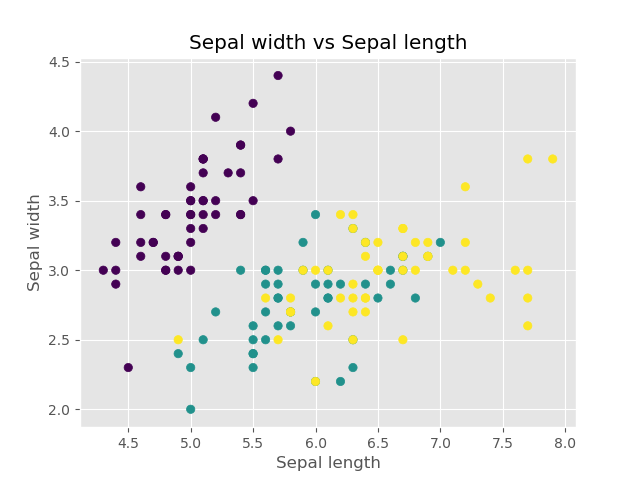

In [27]:
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
#sepal length vs sepal width
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(treino[:,0],treino[:,1], c=classes)

<IPython.core.display.Javascript object>


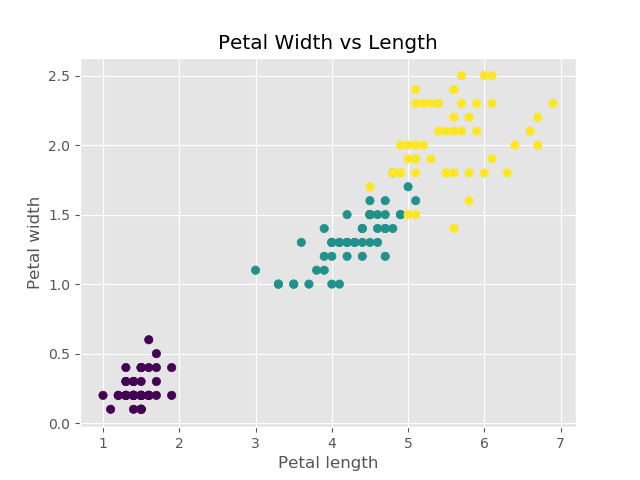

In [28]:
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width vs Length')
plt.scatter(treino[:,2], treino[:,3], c=classes)

<IPython.core.display.Javascript object>


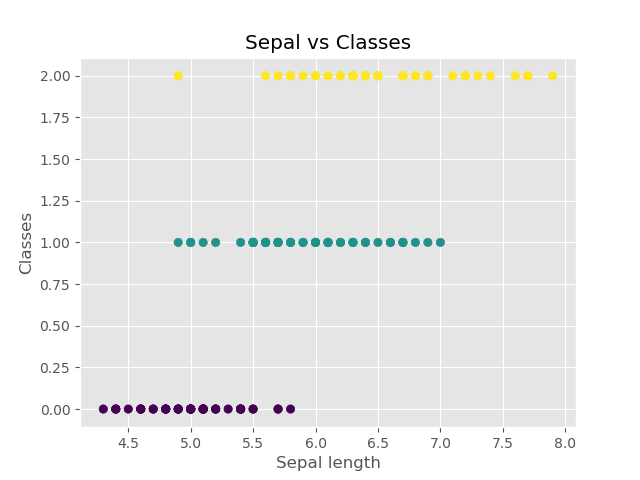

In [15]:
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
plt.xlabel('Sepal length')
plt.ylabel('Classes')
plt.title('Sepal vs Classes')
#sepal length vs sepal width
plt.scatter(treino[:,0],classes, c=classes)
plt.show()

<IPython.core.display.Javascript object>


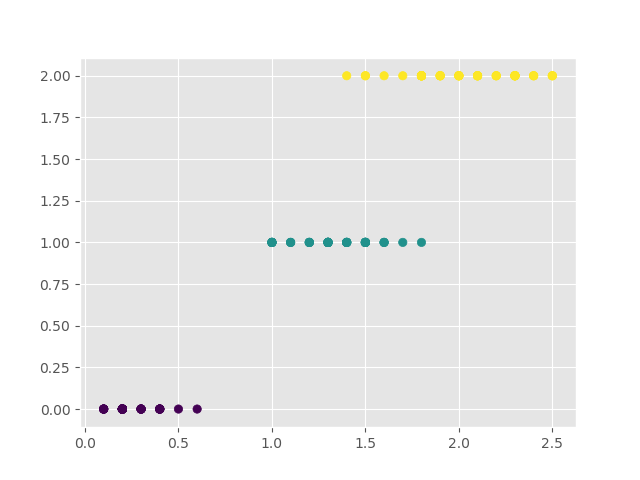

In [16]:
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
#sepal length vs sepal width
plt.scatter(treino[:,3],classes, c=classes)

In [20]:
len(treino[:-30]), len(classes[:-30])

(120, 120)

In [22]:
clf = svm.SVC().fit(treino[:-30],classes[:-30])
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

O que fizemos foi criar um objeto chamado *clf*. Esse objeto recebe o retorno do método *fit()* que é o treino do algoritmo SVM. Agora temos um SVM treinado com as 120 linhas da nossa base de dados. Para testar o classificador, vamos classificar as últimas 30 linhas dos dados **(já que  o algoritmo não conhece esses dados)**.

   Agora é só usar o método ‘predict’ do nosso objeto classificador.

In [23]:
clf.predict(treino[-30:])

array([2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

In [24]:
classes[-30:]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

Agora vamos comparar o resultado do classificador graficamente:

<IPython.core.display.Javascript object>


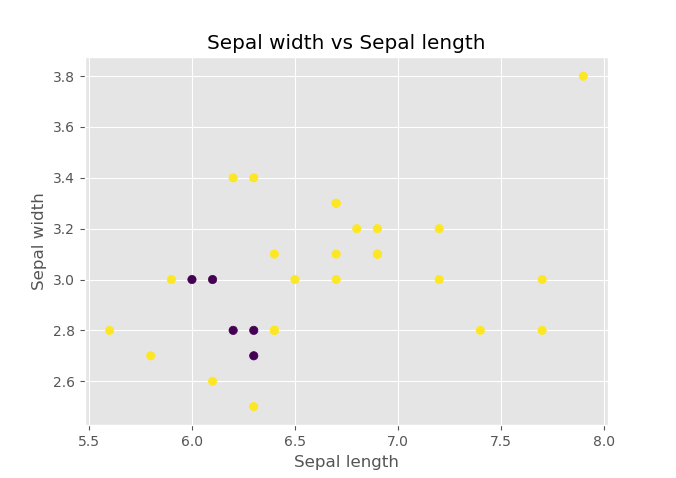

In [26]:
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
#sepal length vs sepal width
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(treino[-30:,0],treino[-30:,1], c=clf.predict(treino[-30:]))

No comando acima plotamos um gráfico de dispersão usando a coluna Sepal Length e Sepal Width e as cores dos pontos são os valores preditos pelo classificador. Veja que os pontos *roxos* são os pontos onde o classificador *errou*, e em *amarelo* são os pontos que ele *acertou*, ou seja, de 30 o SVM errou apenas 5.

<IPython.core.display.Javascript object>


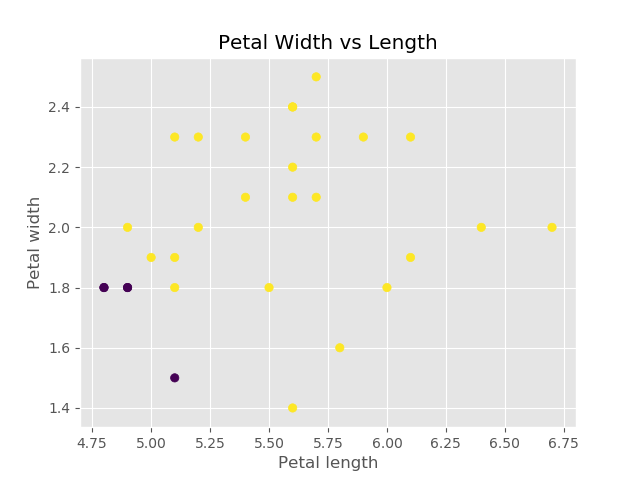

In [29]:
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width vs Length')
plt.scatter(treino[-30:,2], treino[-30:,3], c=clf.predict(treino[-30:]))

<IPython.core.display.Javascript object>


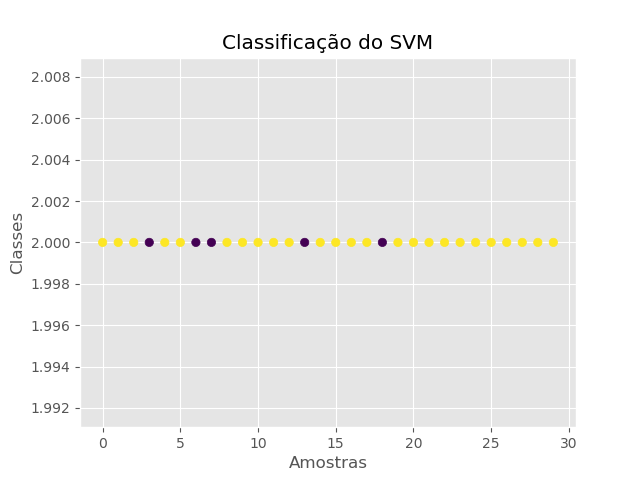

In [33]:
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
#sepal length vs sepal width
plt.xlabel('Amostras')
plt.ylabel('Classes')
plt.title('Classificação do SVM')
plt.scatter(range(len(classes[-30:])),classes[-30:],c=clf.predict(treino[-30:]))

In [31]:
def Acuracia(clf,X,y):
    resultados = cross_val_predict(clf, X, y, cv=5)
    return metrics.accuracy_score(y,resultados)

  O SVM se saiu bem nesse teste. Uma forma de validar o classificador é usar a técnica chamada *Cross Validation*, que consiste em dividir o dado de treino e teste de forma que todo o dado é testado. Dessa forma, resolvemos o problema de variância nos dados.
  
  Vou criar uma função que faz o Cross Validation e nos retorna a acurácia média. Assim, é só chamar a função na hora que precisarmos.

In [32]:
Acuracia(clf,treino,classes)

0.97999999999999998